# Deep learning from scratch: homework 2

# Xiao Zidong.      ZXR5777

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset we [we saw in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_3_logistic_regression.slides.html#/14/1) to test out your code.  This dataset is in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import math

ImportError: No module named autograd.numpy

In [36]:
csvname = '/Users/tomx/Desktop/deep_learning_hw_2/3d_classification_data_v2.csv'
data = np.loadtxt(csvname, delimiter=',')

x = data[:,:-1]
y = data[:, -1]

In [37]:
def gradient_descent(g, alpha, max_its, w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w  # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)  # lowest evaluation yet
    w_history=[w]

    j=0
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha * grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)

        w_history.append(w)

    return w_history


In [38]:
def cost_history(weight_history, g):
    cost_function=[0]
    cost_function[0]=g(weight_history[0])
    for k in range (1,len(weight_history)):
        cost_function.append(g(weight_history[k]))
    return cost_function

In [39]:
def softmax(w):
    cost = 0
    for p in range(0,len(y)):

        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*(w[0] + w[1]*x[p][0]+w[2]*x[p][1])))
    return cost


In [ ]:
def count_mis(a,b):
    result=0
    for i in range (len(a)):
        if a[i]!=b[i]:
            result=result+1

    return result


In [ ]:
def misclassfication(w):
    result=[]
    for i in w:
        t = []

        for p in range(len(y)):
            r=i[0]+i[1]*x[p][0]+i[2]*x[p][1]
            if r>0:
                t.append(1)
            else:
                t.append(-1)


        result.append(count_mis(t,y))
    return result

In [ ]:
w = np.asarray([1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 0.001,max_its = 1000,w = w)
g=softmax

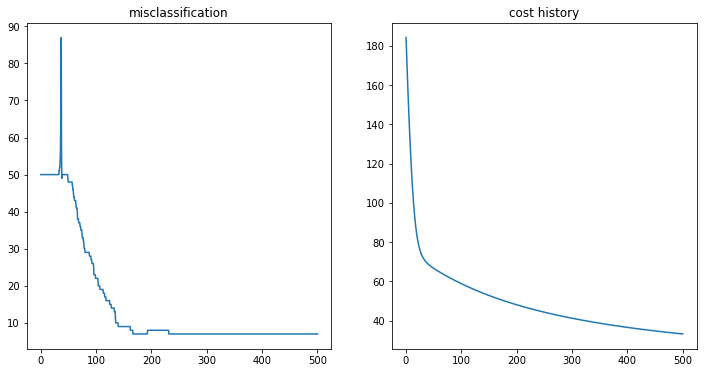

In [167]:
b=cost_history(weight_history,softmax)
a=misclassfication(weight_history)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
w_vals = np.linspace(0, 500, len(weight_history))

ax1.plot(w_vals, a)
ax2.plot(w_vals,b)
ax1.set_title("misclassification")
ax2.set_title("cost history")

plt.show()

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [ ]:
csvname = '/Users/tomx/Desktop/deep_learning_hw_2/breast_cancer_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = data[:,:-1]
y = data[:, -1]


In [ ]:
def gradient_descent(g, alpha, max_its, w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w  # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)  # lowest evaluation yet
    w_history=[w]

    j=0
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha * grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)

        w_history.append(w)

    return w_history


In [ ]:
def cost_history(weight_history, g):
    cost_function=[0]
    cost_function[0]=g(weight_history[0])
    for k in range (1,len(weight_history)):
        cost_function.append(g(weight_history[k]))
    return cost_function

In [ ]:
def softmax(w):
    cost = 0
    for p in range(0,len(y)):

        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*(w[0] + w[1]*x[p][0]+w[2]*x[p][1]+w[3]*x[p][2]+w[4]*x[p][3]+w[5]*x[p][4]+w[6]*x[p][5]+w[7]*x[p][6]+w[8]*x[p][7])))
    return cost

In [ ]:
def misclassfication(w):
    result=[]
    for i in w:
        t = []

        for p in range(len(y)):
            r=i[0]+i[1]*x[p][0]+i[2]*x[p][1]+i[3]*x[p][2]+i[4]*x[p][3]+i[5]*x[p][4]+i[6]*x[p][5]+i[7]*x[p][6]+i[8]*x[p][7]
            if r>0:
                t.append(1)
            else:
                t.append(-1)


        result.append(count_mis(t,y))
    return result

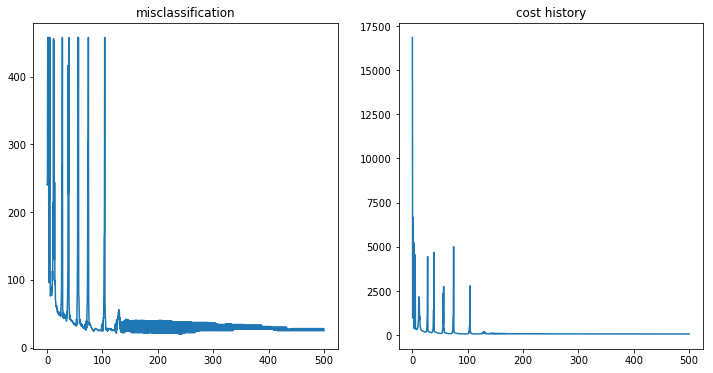

In [150]:
w = np.asarray([1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 0.001,max_its = 1000,w = w)
g=softmax

b=cost_history(weight_history,softmax)
a=misclassfication(weight_history)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
w_vals = np.linspace(0, 500, len(weight_history))

ax1.plot(w_vals, a)
ax2.plot(w_vals,b)
ax1.set_title("misclassification")
ax2.set_title("cost history")

plt.show()

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset we saw [in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_5_one_versus_all.slides.html#/) - located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [4]:
csvname = '/Users/tomx/Desktop/deep_learning_hw_2/3class_data.csv'
data = np.loadtxt(csvname, delimiter=',')

In [5]:
x = data[:,:-1]
y = data[:, -1]
y1=[]
y2=[]
y3=[]
for i in range(len(y)):
    if y[i]==1:
        y1.append(1)
        y2.append(-1)
        y3.append(-1)
    if y[i]==2:
        y1.append(-1)
        y2.append(1)
        y3.append(-1)
    if y[i]==3:
        y1.append(-1)
        y2.append(-1)
        y3.append(1)


In [6]:
def gradient_descent(g, alpha, max_its, w,y):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w  # weight we return, should be the one providing lowest evaluation
    best_eval = g(w,y)  # lowest evaluation yet
    w_history=[w]

    j=0
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w,y)

        # take gradient descent step
        w = w - alpha * grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w,y)

        w_history.append(w)




    return w_history

In [7]:
def softmax(w,y):
    cost = 0
    for p in range(0,len(y)):

        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*(w[0] + w[1]*x[p][0]+w[2]*x[p][1])))
    return cost



In [8]:
def OVA(w1,w2,w3,n):
    result=[]

    t1 = []

    for p in range(len(y)):
            r=w1[n][0]+w1[n][1]*x[p][0]+w1[n][2]*x[p][1]
            if r>0:
                t1.append([x[p][0],x[p][1]])

    m1=[]
    n1=[]
    for i in t1:
        m1.append(i[0])
        n1.append([i[1]])

    t2 = []

    for p in range(len(y)):
            r=w2[n][0]+w2[n][1]*x[p][0]+w2[n][2]*x[p][1]
            if r>0:
                t2.append([x[p][0],x[p][1]])

    m2=[]
    n2=[]
    for i in t2:
        m2.append(i[0])
        n2.append([i[1]])

    t3 = []

    for p in range(len(y)):
        r = w3[n][0] + w3[n][1] * x[p][0] + w3[n][2] * x[p][1]
        if r > 0:
            t3.append([x[p][0], x[p][1]])

    m3 = []
    n3 = []
    for i in t3:
        m3.append(i[0])
        n3.append([i[1]])

    x_vals1 = np.linspace(0, 0.8, 200)
    y_vals1= -(w1[n][0]+w1[n][1]*x_vals1)/w1[n][2]
    x_vals2 = np.linspace(0.4, 0.8, 200)
    y_vals2 = -(w2[n][0] + w2[n][1] * x_vals2) / w2[n][2]
    x_vals3 = np.linspace(0, 1, 200)
    y_vals3 = -(w3[n][0] + w3[n][1] * x_vals3) / w3[n][2]
    colorlist=[]
    for p in range(len(y)):
        if y[p]==1:
            colorlist.append('r')
        if y[p]==2:
            colorlist.append('b')
        if y[p]==3:
            colorlist.append('g')




    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
    ax2.scatter(m1,n1,color='r', edgecolor='w')
    ax2.scatter(m2, n2, color='b', edgecolor='w')
    ax2.scatter(m3, n3, color='g', edgecolor='w')
    ax2.plot(x_vals1,y_vals1,color='r')
    ax2.plot(x_vals2,y_vals2,color='b')
    ax2.plot(x_vals3, y_vals3, color='g')



    ax1.scatter(data[:, 0], data[:, 1], color=colorlist, edgecolor='w')
    ax1.set_title("original data")
    ax2.set_title("classified data")


    plt.show()

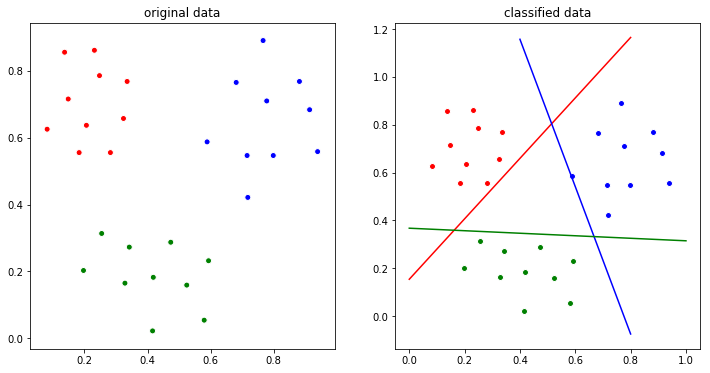

In [9]:
w = np.asarray([1.5,1.5,1.5])

weight_history1 = gradient_descent(g = softmax,alpha = 0.01,max_its = 500,w = w,y=y1)  #for the red data
weight_history2 = gradient_descent(g = softmax,alpha = 0.01,max_its = 500,w = w,y=y2)  #for the blue data
weight_history3 = gradient_descent(g = softmax,alpha = 0.01,max_its = 500,w = w,y=y3)  #for the green data

OVA(weight_history1,weight_history2,weight_history3,499) #Since the max_its=500, 499 is the best weight and I use it to
                                                        #classify the data

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [81]:

csvname = '/Users/tomx/Desktop/deep_learning_hw_2/bricks.csv'
data = np.loadtxt(csvname, delimiter=',')
x = data[:,:-1]
y = data[:, -1]

In [82]:
def softmax(w):
    cost = 0
    for p in range(0,len(y)):

        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*(w[0] + w[1]*x[p][0]+w[2]*np.sin(2*w[3]*np.pi*x[p][1]+w[4]))))

    return cost


In [83]:
def misclassfication(w):
    result=[]
    for i in w:
        t = []

        for p in range(len(y)):
            r=i[0] + i[1]*x[p][0]+i[2]*np.sin(2*i[3]*np.pi*x[p][1]+i[4])
            if r>0:
                t.append(1)
            else:
                t.append(-1)


        result.append(count_mis(t,y))
    return result



In [84]:
def gradient_descent(g, alpha, max_its, w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w  # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)  # lowest evaluation yet
    w_history=[w]

    j=0
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha * grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)

        w_history.append(w)

    return w_history

In [85]:
def count_mis(a,b):
    result=0
    for i in range (len(a)):
        if a[i]!=b[i]:
            result=result+1

    return result

In [86]:
def cost_history(weight_history, g):
    cost_function=[0]
    cost_function[0]=g(weight_history[0])
    for k in range (1,len(weight_history)):
        cost_function.append(g(weight_history[k]))
    return cost_function

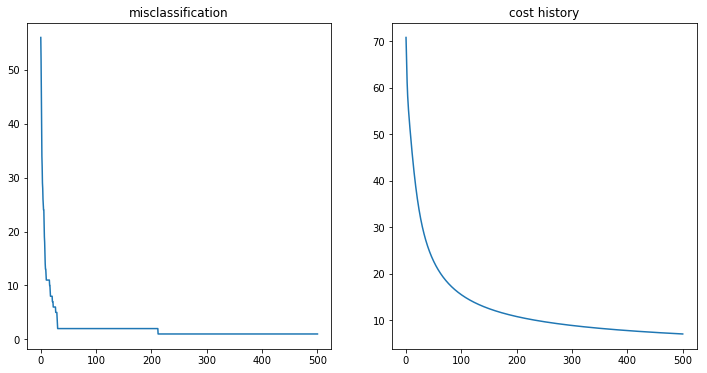

In [88]:
# run gradient descent
w = np.asarray([0.5,0.5,0.5,0.5,0.5])

weight_history = gradient_descent(g = softmax,alpha = 0.001,max_its = 1000,w = w)


b=cost_history(weight_history,softmax)
a=misclassfication(weight_history)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
w_vals = np.linspace(0, 500, len(weight_history))

ax1.plot(w_vals, a)
ax2.plot(w_vals,b)
ax1.set_title("misclassification")
ax2.set_title("cost history")



plt.show()

In [105]:
def Non_linear(w1, n):
   



    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    x_vals = np.linspace(-1, 1, 200)
    y_vals = -(w1[n][0] +w1[n][2]*np.sin(2*w1[n][3]*np.pi*x_vals+w1[n][4]))/w1[n][1]
    
 
    color=[]
    for p in range(len(y)):
        if y[p]==1:
            color.append('r')
        if y[p]==-1:
            color.append('b')


    ax2.scatter(data[:, 0], data[:, 1], color=color, edgecolor='w')
    ax2.plot(y_vals,x_vals,color='r')
    ax1.scatter(data[:, 0], data[:, 1], color=color, edgecolor='w')
    ax1.set_title("original data")
    ax2.set_title("classified data")

    plt.show()


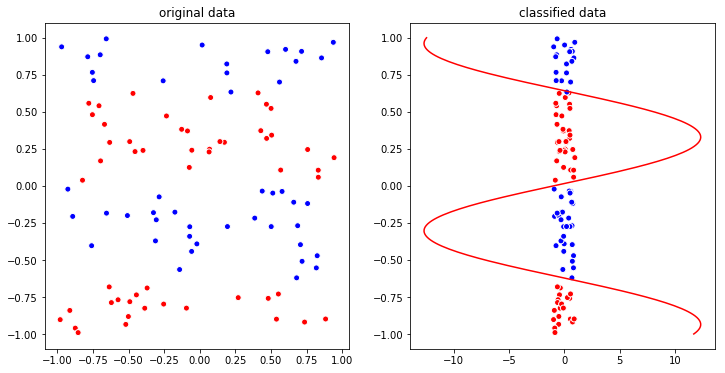

In [106]:
Non_linear(weight_history,999)